# Import Library

In [4]:
# import drive mount for google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# save filepath to variable for easier access
path="/content/drive/My Drive/Magister/Holistik/data3.csv"
# import pandas
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as lines
# import seaborn
import seaborn as sns
# one hot encoder
from sklearn.preprocessing import OneHotEncoder
# oversampling using smote
from imblearn.over_sampling import SMOTE
# splitting dataset, import randomized search
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# random forest
from sklearn.ensemble import RandomForestClassifier
# classification report
from sklearn.metrics import classification_report
# plot tree
from sklearn.tree import plot_tree
# import roc, confusion matrix
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

Mounted at /content/drive


# Data Preparation

In [5]:
# read the data and store data into dataframe
dataframe=pd.read_csv(path, delimiter = ",")
# print a summary of the data
dataframe.head()

,grade_biologi_odd,kkm_biologi_odd,grade_biologi_even,kkm_biologi_even,grade_fisika_odd,kkm_fisika_odd,grade_fisika_even,kkm_fisika_even,grade_kimia_odd,kkm_kimia_odd,...,grade_bahasa_korea_odd,kkm_bahasa_korea_odd,grade_bahasa_korea_even,kkm_bahasa_korea_even,grade_bahasa_jerman_odd,kkm_bahasa_jerman_odd,grade_bahasa_jerman_even,kkm_bahasa_jerman_even,name,status
0,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0.0,0,Sastra China,1.0
1,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0.0,0,Psikologi,1.0
2,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0.0,0,Seni Rupa dan Desain,1.0
3,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0.0,0,Pendidikan Dokter,0.0
4,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0.0,0,Sastra Inggris,1.0


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13188 entries, 0 to 13187
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   grade_biologi_odd            13188 non-null  object 
 1   kkm_biologi_odd              13188 non-null  object 
 2   grade_biologi_even           13185 non-null  object 
 3   kkm_biologi_even             13185 non-null  float64
 4   grade_fisika_odd             13185 non-null  float64
 5   kkm_fisika_odd               13185 non-null  object 
 6   grade_fisika_even            13185 non-null  float64
 7   kkm_fisika_even              13185 non-null  object 
 8   grade_kimia_odd              13185 non-null  float64
 9   kkm_kimia_odd                13185 non-null  float64
 10  grade_kimia_even             13185 non-null  float64
 11  kkm_kimia_even               13185 non-null  object 
 12  grade_sosiologi_odd          13185 non-null  object 
 13  kkm_sosiologi_od

In [7]:
dataframe.shape

(13188, 54)

In [8]:
dataframe.isnull().sum()

grade_biologi_odd              0
kkm_biologi_odd                0
grade_biologi_even             3
kkm_biologi_even               3
grade_fisika_odd               3
kkm_fisika_odd                 3
grade_fisika_even              3
kkm_fisika_even                3
grade_kimia_odd                3
kkm_kimia_odd                  3
grade_kimia_even               3
kkm_kimia_even                 3
grade_sosiologi_odd            3
kkm_sosiologi_odd              3
grade_sosiologi_even           3
kkm_sosiologi_even             3
grade_geografi_odd             3
kkm_geografi_odd               3
grade_geografi_even            3
kkm_geografi_even              3
grade_ekonomi_odd              3
kkm_ekonomi_odd                3
grade_ekonomi_even             3
kkm_ekonomi_even               3
grade_matematika_odd           3
kkm_matematika_odd             3
grade_matematika_even          3
kkm_matematika_even            3
grade_bahasa_inggris_odd       3
kkm_bahasa_inggris_odd         3
grade_baha

In [9]:
dataframe.describe()

,kkm_biologi_even,grade_fisika_odd,grade_fisika_even,grade_kimia_odd,kkm_kimia_odd,grade_kimia_even,grade_sosiologi_even,kkm_sosiologi_even,kkm_geografi_odd,grade_geografi_even,...,grade_bahasa_inggris_even,grade_bahasa_indonesia_odd,grade_bahasa_mandarin_odd,grade_bahasa_jepang_odd,kkm_bahasa_jepang_odd,kkm_bahasa_jepang_even,grade_bahasa_korea_even,grade_bahasa_jerman_odd,grade_bahasa_jerman_even,status
count,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,...,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.0,13185.000000,13185.000000,13185.000000
mean,23.884262,27.952825,28.652256,28.507016,23.095336,27.879029,11.920440,10.164960,10.319378,11.898066,...,43.298445,42.118316,0.234433,0.276830,0.288965,0.249602,0.0,0.093364,0.125446,0.491619
std,34.436359,39.562578,40.138977,39.674131,34.146432,39.847451,29.224513,25.338393,25.473388,29.431634,...,42.637256,42.327698,4.557850,4.909957,4.639614,4.316228,0.0,2.865964,3.303386,0.499949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,70.000000,80.000000,81.000000,80.000000,70.000000,80.000000,0.000000,0.000000,0.000000,0.000000,...,85.000000,85.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,88.000000,100.000000,100.000000,100.000000,85.000000,100.000000,99.000000,88.000000,88.000000,100.000000,...,99.000000,100.000000,98.000000,100.000000,78.000000,78.000000,0.0,97.000000,91.000000,1.000000


# Plotting

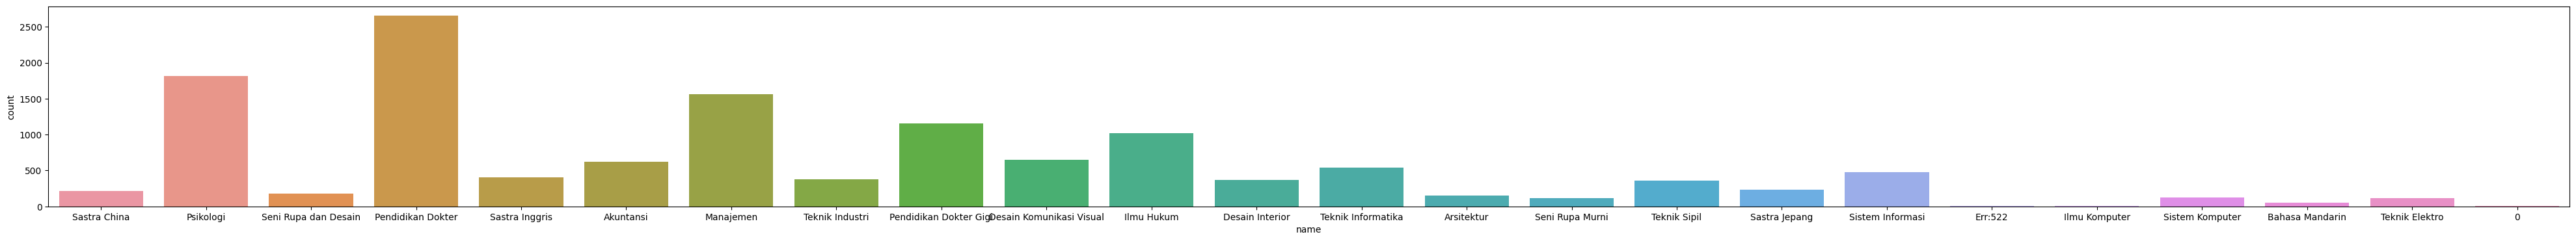

In [10]:
plt.figure(figsize = (50,4))
sns.countplot(x='name', data=dataframe)
plt.show()

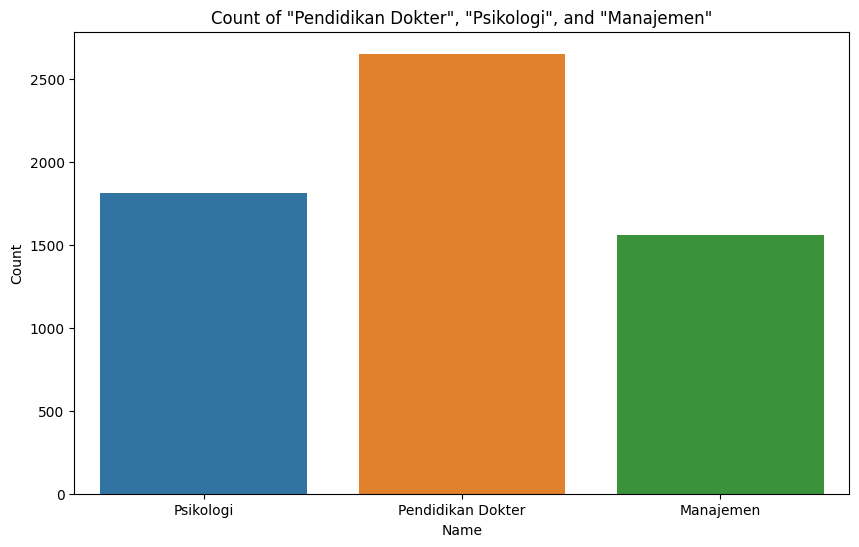

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe to include only the desired names
filtered_df = dataframe[dataframe['name'].isin(['Pendidikan Dokter', 'Psikologi', 'Manajemen'])]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the countplot using the filtered dataframe
sns.countplot(x='name', data=filtered_df)

# Add labels and title
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Count of "Pendidikan Dokter", "Psikologi", and "Manajemen"')
plt.show()

In [12]:
counts = dataframe['name'].value_counts()
print(counts)

Pendidikan Dokter           2653
Psikologi                   1812
Manajemen                   1560
Pendidikan Dokter Gigi      1157
Ilmu Hukum                  1015
Desain Komunikasi Visual     650
Akuntansi                    620
Teknik Informatika           537
Sistem Informasi             476
Sastra Inggris               402
Teknik Industri              379
Desain Interior              367
Teknik Sipil                 363
Sastra Jepang                234
Sastra China                 212
Seni Rupa dan Desain         175
Arsitektur                   148
Sistem Komputer              125
Teknik Elektro               118
Seni Rupa Murni              112
Bahasa Mandarin               52
Ilmu Komputer                 10
Err:522                        4
0                              4
Name: name, dtype: int64


In [13]:
# dataframe = dataframe[dataframe['name'].isin(['Psikologi','Pendidikan Dokter Gigi'])]
dataframe = dataframe[dataframe['name'].isin(['Pendidikan Dokter', 'Psikologi','Pendidikan Dokter Gigi'])]
dataframe

,grade_biologi_odd,kkm_biologi_odd,grade_biologi_even,kkm_biologi_even,grade_fisika_odd,kkm_fisika_odd,grade_fisika_even,kkm_fisika_even,grade_kimia_odd,kkm_kimia_odd,...,grade_bahasa_korea_odd,kkm_bahasa_korea_odd,grade_bahasa_korea_even,kkm_bahasa_korea_even,grade_bahasa_jerman_odd,kkm_bahasa_jerman_odd,grade_bahasa_jerman_even,kkm_bahasa_jerman_even,name,status
1,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0.0,0,Psikologi,1.0
3,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0.0,0,Pendidikan Dokter,0.0
5,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0.0,0,Psikologi,1.0
8,85,75,85,0.0,0.0,0,0.0,75,0.0,0.0,...,0,0,0.0,0,0.0,0,0.0,0,Psikologi,0.0
10,78,75,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0.0,0,Psikologi,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13181,90,75,92,75.0,94.0,75,92.0,75,80.0,75.0,...,0,0,0.0,0,0.0,0,0.0,0,Pendidikan Dokter,1.0
13183,89,75,89,75.0,75.0,75,84.0,75,84.0,75.0,...,0,0,0.0,0,0.0,0,0.0,0,Psikologi,1.0
13184,80,75,82,75.0,80.0,75,81.0,75,88.0,75.0,...,0,0,0.0,0,0.0,0,0.0,0,Pendidikan Dokter Gigi,1.0
13185,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0,0.0,0,0.0,0,0.0,0,Pendidikan Dokter,1.0


In [14]:
dataframe = dataframe[dataframe['status'] != 0]
dataframe.shape

(2694, 54)

In [15]:
counts = dataframe['name'].value_counts()
print(counts)

Pendidikan Dokter         1269
Psikologi                  881
Pendidikan Dokter Gigi     544
Name: name, dtype: int64


In [16]:
X = dataframe.drop(['name','status'],axis=1)
X.shape

(2694, 52)

In [17]:
X

,grade_biologi_odd,kkm_biologi_odd,grade_biologi_even,kkm_biologi_even,grade_fisika_odd,kkm_fisika_odd,grade_fisika_even,kkm_fisika_even,grade_kimia_odd,kkm_kimia_odd,...,grade_bahasa_jepang_even,kkm_bahasa_jepang_even,grade_bahasa_korea_odd,kkm_bahasa_korea_odd,grade_bahasa_korea_even,kkm_bahasa_korea_even,grade_bahasa_jerman_odd,kkm_bahasa_jerman_odd,grade_bahasa_jerman_even,kkm_bahasa_jerman_even
1,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0
5,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0
11,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0
12,0,0,0,0.0,0.0,0,0.0,0,0.0,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0
18,84,72,87,72.0,82.0,72,82.0,72,83.0,72.0,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13173,90,76,90,76.0,88.0,76,89.0,76,90.0,76.0,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0
13181,90,75,92,75.0,94.0,75,92.0,75,80.0,75.0,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0
13183,89,75,89,75.0,75.0,75,84.0,75,84.0,75.0,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0
13184,80,75,82,75.0,80.0,75,81.0,75,88.0,75.0,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0


# Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataframe['name'] = le.fit_transform(dataframe['name'])
dataframe['name']

<ipython-input-18-0e0ad269587a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['name'] = le.fit_transform(dataframe['name'])


1        2
5        2
11       2
12       0
18       0
        ..
13173    0
13181    0
13183    2
13184    1
13185    0
Name: name, Length: 2694, dtype: int64

In [19]:
import numpy as np
y = dataframe['name'].values[:,np.newaxis]
y.shape

(2694, 1)

In [20]:
y

array([[2],
       [2],
       [2],
       ...,
       [2],
       [1],
       [0]])

# Splitting Data

In [21]:
# split the data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1724, 52)
Number transactions y_train dataset:  (1724, 1)
Number transactions X_test dataset:  (539, 52)
Number transactions y_test dataset:  (539, 1)


In [22]:
# find the indices of NaN values in y_train
nan_indices = np.isnan(y_train)

# remove NaN values from X_train and y_train
X_train = X_train[~nan_indices]
y_train = y_train[~nan_indices]

# Random Forest

In [23]:
# create a random forest classifier with default hyperparameters
rf = RandomForestClassifier()

# Random Search

In [24]:
# define the hyperparameters to search over
param_distributions = {'n_estimators': [10, 50, 100, 200],
                       'max_depth': [None, 5, 10, 20],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4]}

In [25]:
# Remove feature names from X
# X_train = pd.DataFrame(X_train.values)

# Perform randomized search over the hyperparameters
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=10, cv=5, error_score='raise')
# X_train = X_train.values # conversion of X  into array
random_search.fit(X_train, y_train)

# Fit the classifier to the data using the best hyperparameters found by randomized search
rf_best = random_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200)

# Classification Report

In [26]:
# X_val = X_val.values # conversion of X  into array

In [27]:
y_pred = rf_best.predict(X_val)

In [28]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.98      0.66       198
           1       0.00      0.00      0.00        84
           2       0.89      0.21      0.34       149

    accuracy                           0.52       431
   macro avg       0.46      0.40      0.33       431
weighted avg       0.53      0.52      0.42       431



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# X_test = X_test.values # conversion of X  into array

In [30]:
# make predictions on the testing set and evaluate the performance
y_test_pred = rf_best.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.53      0.98      0.69       266
           1       0.00      0.00      0.00       112
           2       0.86      0.23      0.36       161

    accuracy                           0.55       539
   macro avg       0.46      0.40      0.35       539
weighted avg       0.52      0.55      0.45       539



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Plot Tree

[[0.5500564  0.21266443 0.23727918]]


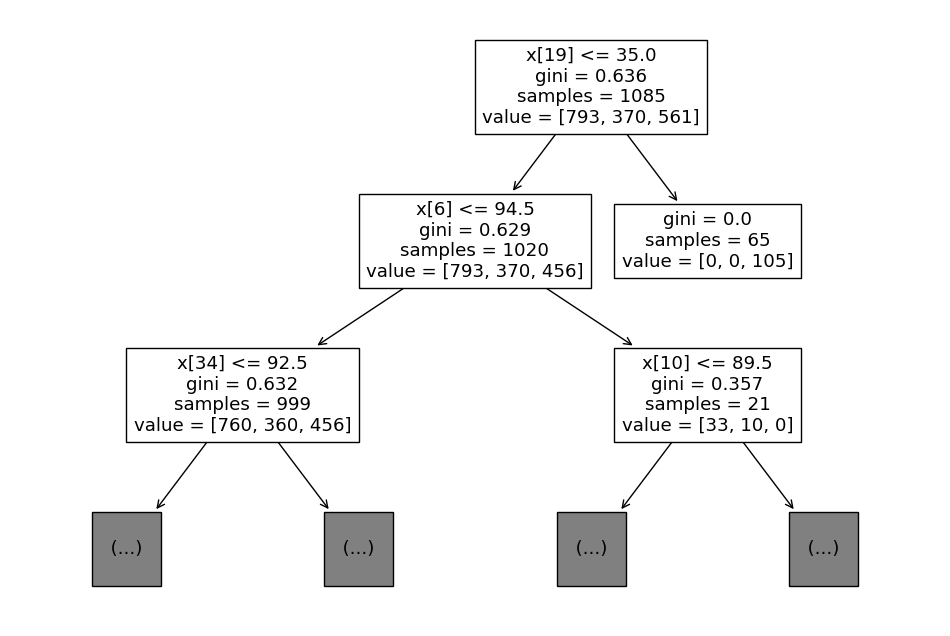

In [31]:
# plot the first decision tree in the random forest
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(rf_best.estimators_[0], max_depth=2, ax=ax)

# to visualize the probability of each class at each node, use the `predict_proba` method on the entire random forest.
# for example, to predict the probability of each class for the first instance in the test set:
probs = rf_best.predict_proba(X_test[:1])
print(probs)

In [47]:
X_test[:1]

,grade_biologi_odd,kkm_biologi_odd,grade_biologi_even,kkm_biologi_even,grade_fisika_odd,kkm_fisika_odd,grade_fisika_even,kkm_fisika_even,grade_kimia_odd,kkm_kimia_odd,...,grade_bahasa_jepang_even,kkm_bahasa_jepang_even,grade_bahasa_korea_odd,kkm_bahasa_korea_odd,grade_bahasa_korea_even,kkm_bahasa_korea_even,grade_bahasa_jerman_odd,kkm_bahasa_jerman_odd,grade_bahasa_jerman_even,kkm_bahasa_jerman_even
11195,72,65,76,65.0,80.0,65,80.0,65,78.0,65.0,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0


# ROC

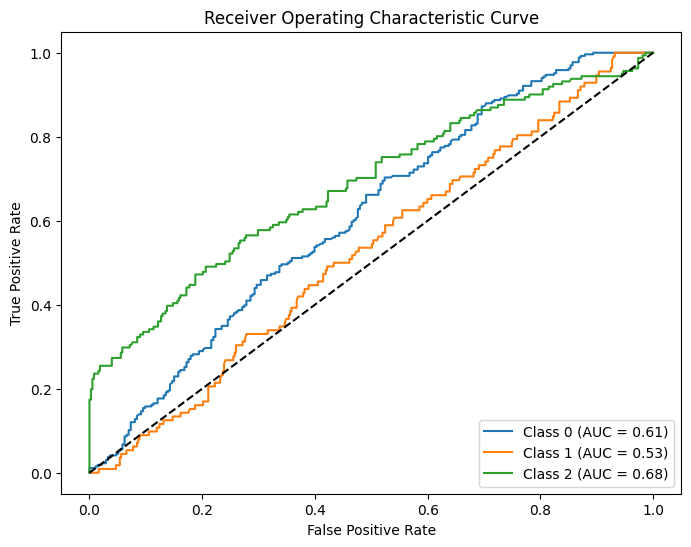

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Predict class probabilities for test set
y_pred_proba = rf_best.predict_proba(X_test)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the labels using label_binarize function
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Assuming y_pred_proba contains the predicted probabilities for each class
roc_scores = []
for i in range(len(np.unique(y_test))):
    roc_score = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
    roc_scores.append(roc_score)
    print("ROC AUC Score for Class", i, ":", roc_score)

ROC AUC Score for Class 0 : 0.610489134925225
ROC AUC Score for Class 1 : 0.5255311140849782
ROC AUC Score for Class 2 : 0.6840431824903874


# Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

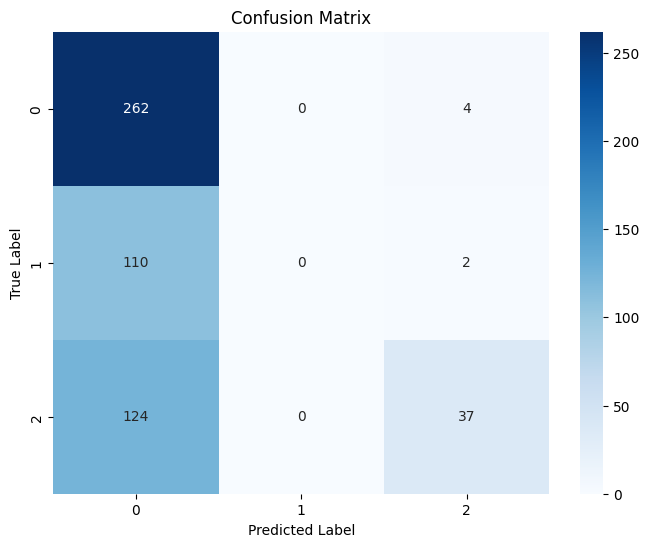

In [33]:
# calculate confusion matrix
y_pred = rf_best.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Save Model

In [34]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # save the model to an HDF5 file
# rf_best.save('model.h5')

# Load Model

In [35]:
# from tensorflow.keras.models import load_model
# model = load_model('model.h5')

# TF.js

In [36]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [37]:
# path = "/content/sample_data"

In [38]:
# tf.__version__

In [39]:
# import tensorflow as tf

# ## versi 1.x
# # tf.contrib.saved_model.save_keras_model(model, path)

# ## versi 2.x
# # tf.keras.experimental.export_saved_model(model, path)
# # rf.save('model.json')

# Pickle

In [40]:
# ## Convert to pickle
# import pickle
# with open('model.pkl', 'wb') as file:
#   pickle.dump(rf_best, file)

In [41]:
# ## Convert to pickle
# import pickle
# with open('model.h5', 'wb') as file:
#   pickle.dump(rf_best, file)

In [42]:
# ## Convert to pickle
# import pickle
# with open('model.json', 'wb') as file:
#   pickle.dump(rf_best, file)